# Data preprocesing 

Metadata and protein data need to be curated before a differential expresion analysis can be performed. Quantitation of proteins was performed using LFQ intensities given by MaxQuant.

#### Metadata
This is a manual curated file and anonimysed from the original BLSA metadata.

In [1]:
metadata<- read.table("/mnt/data/Proteomics//input/metadata.txt",header=T)
head(metadata)

,sampleID,diagnosis,age,sex,pmi,APOEgeno
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,Intensity.ctl033,CONTROL,81,1,20,E3/E3
2,Intensity.ad059,AD,83,0,18,E3/E3
3,Intensity.ctl035,CONTROL,80,1,22,E3/E3
4,Intensity.ctl037,CONTROL,90,0,14,E3/E3
5,Intensity.ad061,AD,81,1,7,E3/E3
6,Intensity.ad063,AD,90,1,14,E3/E3


In [2]:
table(metadata$diagnosis)


     AD CONTROL 
     20      13 

In [3]:
table(metadata$APOEgeno)


E2/E3 E3/E3 E3/E4 E4/E4 
    8    17     6     2 

#### Protein data

In [9]:
intensity.data<- read.table("/mnt/data/Proteomics//input/MaxQuantCorrIntensityUniprot.csv",sep=",",header=T,row.names=1)
dim(intensity.data)
head(intensity.data)

[1] 4744  361

,UniqueID,Symbol.or.Gene.Name,UniprotID.or.Contam.ID,Protein.IDs,Majority.protein.IDs,Peptide.counts..all.,Peptide.counts..razor.unique.,Peptide.counts..unique.,Fasta.headers,Number.of.proteins,...,MS.MS.Count,Only.identified.by.site,Reverse,Potential.contaminant,Numeric.ID,Peptide.IDs,Peptide.is.razor,Deamidation..NQ..site.positions,Oxidation..M..site.positions,Count.NA..intensity.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,...,<int>,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,MBP|P02686-5,MBP,P02686-5,sp|P02686-5|MBP_HUMAN;tr|A8MZH3|A8MZH3_HUMAN;tr|E9PJ72|E9PJ72_HUMAN;tr|J3QL64|J3QL64_HUMAN;tr|E9PMR5|E9PMR5_HUMAN;tr|H0YF02|H0YF02_HUMAN;tr|H0YEA2|H0YEA2_HUMAN;tr|E9PKX9|E9PKX9_HUMAN,sp|P02686-5|MBP_HUMAN;tr|A8MZH3|A8MZH3_HUMAN;tr|E9PJ72|E9PJ72_HUMAN;tr|J3QL64|J3QL64_HUMAN,42;39;37;37;20;20;20;17,1;1;1;1;1;1;1;1,0;0;0;0;0;0;0;0,>sp|P02686-5|MBP_HUMAN Isoform 5 of Myelin basic protein OS=Homo sapiens GN=MBP;>tr|A8MZH3|A8MZH3_HUMAN Myelin basic protein OS=Homo sapiens GN=MBP PE=1 SV=1;>tr|E9PJ72|E9PJ72_HUMAN Myelin basic protein OS=Homo sapiens GN=MBP PE=1 SV=1;>tr|J3QL64|J3QL64_HU,8,...,5225,,NA,,794,2938;3074;6579;6580;6643;6742;6743;11418;11419;12515;12516;12517;13542;14400;14401;14941;15043;15358;15359;16049;16050;16659;16660;17702;22407;28103;28104;29549;29550;33023;33750;34468;35363;35364;35441;37703;37704;39401;39485;39486;45091;45092,False;True;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False,,,0
2,MBP|P02686,MBP,P02686,sp|P02686|MBP_HUMAN;tr|J3QQK6|J3QQK6_HUMAN;tr|C9J6H1|C9J6H1_HUMAN;sp|P02686-2|MBP_HUMAN;tr|J3KT34|J3KT34_HUMAN;tr|J3KS94|J3KS94_HUMAN;tr|J3QKN5|J3QKN5_HUMAN,sp|P02686|MBP_HUMAN;tr|J3QQK6|J3QQK6_HUMAN;tr|C9J6H1|C9J6H1_HUMAN,42;27;23;12;11;3;1,42;27;23;12;11;3;1,1;1;0;1;0;1;1,>sp|P02686|MBP_HUMAN Myelin basic protein OS=Homo sapiens GN=MBP PE=1 SV=3;>tr|J3QQK6|J3QQK6_HUMAN Myelin basic protein OS=Homo sapiens GN=MBP PE=1 SV=1;>tr|C9J6H1|C9J6H1_HUMAN Myelin basic protein (Fragment) OS=Homo sapiens GN=MBP PE=1 SV=1,7,...,5213,,NA,,792,2938;3119;6579;6580;6643;6742;6743;11418;11419;12515;12516;12517;13542;14400;14401;14941;15043;15358;15359;16049;16050;16659;16660;17702;22407;28103;28104;29549;29550;33023;33750;34468;35363;35364;35441;37703;37704;39401;39485;39486;45091;45092,True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True;True,,,0
3,MBP|P02686-3,MBP,P02686-3,sp|P02686-3|MBP_HUMAN,sp|P02686-3|MBP_HUMAN,42,2,0,>sp|P02686-3|MBP_HUMAN Isoform 3 of Myelin basic protein OS=Homo sapiens GN=MBP,1,...,5044,,NA,,793,2938;3074;6579;6580;6643;6742;6743;11418;11419;12515;12516;12517;13542;14400;14401;14941;15358;15359;16049;16050;16659;16660;17702;22407;28103;28104;29549;29550;33750;34468;35363;35364;35441;36681;37703;37704;39401;39485;39486;42807;45091;45092,False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;True;False;False;False;False;False;True;False;False,,,0
4,MBP|H7BYR8,MBP,H7BYR8,tr|H7BYR8|H7BYR8_HUMAN;tr|J3KT01|J3KT01_HUMAN,tr|H7BYR8|H7BYR8_HUMAN,42;10,5;3,2;2,>tr|H7BYR8|H7BYR8_HUMAN Myelin basic protein OS=Homo sapiens GN=MBP PE=1 SV=1,2,...,4858,,NA,,4787,220;2938;3074;5897;6579;6580;6643;6742;6743;11418;11419;12518;12880;12881;13542;14941;15043;15358;15359;16049;16050;16659;16660;17702;22407;28103;28104;29549;29550;33023;33750;34468;35363;35364;35441;37703;37704;39401;39485;39486;45091;45092,True;False;False;True;False;False;False;False;False;False;False;True;True;True;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;False;Fal

* Remove decoy matches and matches to contaminant

In [10]:
unique(intensity.data$Reverse)
unique(intensity.data$Potential.contaminant)

[1] NA

[1] ""  "+"

In [11]:
intensity.data <- intensity.data[!intensity.data$Potential.contaminant=="+",]
#intensity.data <- intensity.data[!intensity.data$Reverse=="+",] # only NA in this dataframe
dim(intensity.data)

[1] 4697  361

*  Extract columns of LFQ intensites

In [12]:
# Extract columns of LFQ intensites
intensity.data.LFQ <- intensity.data[,grep(pattern="^Intensity.",colnames(intensity.data))]
rownames(intensity.data.LFQ) <- intensity.data$UniqueID
head(intensity.data.LFQ,n=3)

,Intensity.ad059,Intensity.ad061,Intensity.ad063,Intensity.ad065,Intensity.ad067,Intensity.ad069,Intensity.ad071,Intensity.ad073,Intensity.ad075,Intensity.ad077,...,Intensity.ctl039,Intensity.ctl041,Intensity.ctl043,Intensity.ctl045,Intensity.ctl047,Intensity.ctl049,Intensity.ctl051,Intensity.ctl053,Intensity.ctl055,Intensity.ctl057
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MBP|P02686-5,1.72606e+11,1.06621e+11,1.46884e+11,99711379238,1.27924e+11,1.20897e+11,1.23047e+11,1.14472e+11,1.20151e+11,2.53384e+11,...,74719262730,1.14940e+11,62287139150,1.67132e+11,33099479968,55998417054,88815414877,1.23970e+11,73515257851,64057889008
MBP|P02686,1.72596e+11,1.06589e+11,1.46854e+11,99691871974,1.27894e+11,1.20876e+11,1.22985e+11,1.14441e+11,1.20084e+11,2.53285e+11,...,74707984220,1.14938e+11,62284493999,1.67132e+11,33103860988,55988666020,88815414877,1.23951e+11,73513396163,64048396649
MBP|P02686-3,1.69671e+11,1.03551e+11,1.46246e+11,99165175850,1.26450e+11,1.18639e+11,1.18040e+11,1.13118e+11,1.19274e+11,2.51523e+11,...,73830863155,1.13019e+11,62012925140,1.61191e+11,32917229549,55784780757,87897191964,1.23534e+11,71664740199,62860988856


* Keep only columns that are present in the metadata table and reasure the same order.

In [13]:
intensity.data.LFQ <- intensity.data.LFQ[, colnames(intensity.data.LFQ) %in% metadata$sampleID ]
dim(intensity.data.LFQ)
# order
intensity.data.LFQ <- intensity.data.LFQ[, metadata$sampleID]
table(metadata$sampleID == colnames(intensity.data.LFQ))

[1] 4697   33


TRUE 
  33 

* Filter on missing values

Usually data contains proteins which are not quantified in all samples. As we are doing differential expression next, the minimum requirement is two values per group. A good practise is to impute the rest of missing values after this filtering (this is not cover here).

A more stringent approach is to filter out all proteins with any missing. 

In [15]:
# count number of NA per row for each condition/group
intensity.data.LFQ$na_count_ctl = rowSums(is.na(intensity.data.LFQ[, grep(pattern="ctl",colnames(intensity.data.LFQ))]))
intensity.data.LFQ$na_count_ad = rowSums(is.na(intensity.data.LFQ[, grep(pattern="ad",colnames(intensity.data.LFQ))]))

In [17]:
# min 2 values per group, do not include counts columns in the final dataset
intensity.data.LFQ.filter = intensity.data.LFQ[intensity.data.LFQ$na_count_ctl<2 & intensity.data.LFQ$na_count_ad<2, -c(34,35)]
dim(intensity.data.LFQ.filter)

[1] 3093   33

In [19]:
# if removing all NAs
intensity.data.dropna<-intensity.data.LFQ[complete.cases(intensity.data.LFQ), ]
dim(intensity.data.dropna)

[1] 2745   35

* Transform to log scale

In [20]:
protein.table <- log2(intensity.data.LFQ.filter)

* Normalization

Normalization is necessary before analysis is performed, in order to ensure that differences in intensities are indeed due to differential expression and not experimental artifacts.

preprocessCore: normalize.quantiles algorithm maps every value on any one chip to the corresponding quantile of the standard distribution. It makes the distribution of probe intensities the same for all arrays (samples). No special allowances are made for outliers. [1]. This functions will handle missing data (ie NA values), based on the assumption that the data is missing at random.

[1]Benjamin Milo Bolstad (2017). preprocessCore: A collection of pre-processing functions. R package version 1.38.1.

In [21]:
suppressPackageStartupMessages(library(preprocessCore))

In [22]:
protein.table.norm<-normalize.quantiles(as.matrix(protein.table))
rownames(protein.table.norm)<-rownames(protein.table)
colnames(protein.table.norm)<-colnames(protein.table)
head(protein.table.norm,n=3L)

,Intensity.ctl033,Intensity.ad059,Intensity.ctl035,Intensity.ctl037,Intensity.ad061,Intensity.ad063,Intensity.ctl039,Intensity.ctl041,Intensity.ad065,Intensity.ad067,...,Intensity.ad087,Intensity.ad089,Intensity.ctl051,Intensity.ctl053,Intensity.ad091,Intensity.ad093,Intensity.ad095,Intensity.ctl055,Intensity.ad097,Intensity.ctl057
MBP|P02686-5,36.63710,36.63710,36.63710,36.63710,36.63710,36.63710,36.54592,36.63710,36.54589,36.63710,...,36.12127,35.86841,36.59142,36.63710,36.63710,36.63710,36.54583,36.63710,36.63710,36.51194
MBP|P02686,36.54586,36.54588,36.54593,36.54582,36.54583,36.54584,36.51220,36.54492,36.51211,36.54592,...,35.90475,35.79846,36.59142,36.54578,36.54587,36.54590,36.51197,36.54587,36.54586,36.46777
MBP|P02686-3,36.51203,36.51208,36.51223,36.51194,36.51197,36.51200,36.46792,36.50957,36.46787,36.51220,...,35.86745,35.76364,36.51208,36.51182,36.51205,36.51214,36.46778,36.51205,36.51203,36.44552


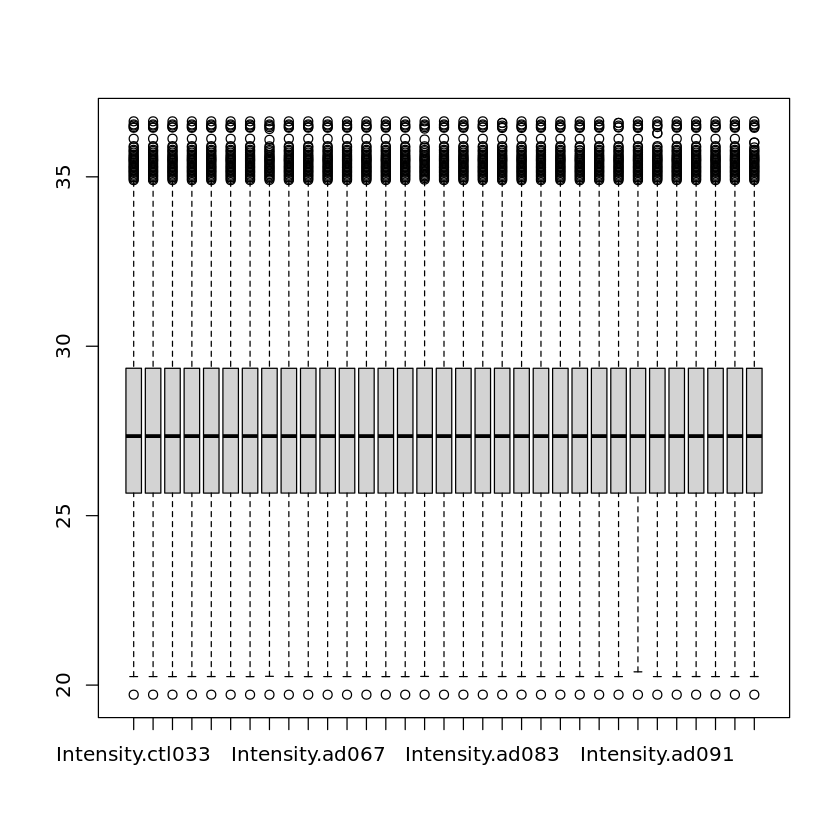

In [23]:
boxplot(protein.table.norm)

#### Unique peptide counts

In [27]:
library(matrixStats)
# we use minimum peptide count among samples
# count unique+razor peptides used for quantification (use column Razor...unique)
pep.count.table = data.frame(count = rowMins(as.matrix(intensity.data[, grep(pattern="^Razor...unique",colnames(intensity.data))])),
                             row.names = intensity.data$UniqueID)
# Minimum peptide count of some proteins can be 0
# add pseudocount 1 to all proteins
pep.count.table$count = pep.count.table$count+1
head(pep.count.table)

,count
,<dbl>
MBP|P02686-5,1
MBP|P02686,21
MBP|P02686-3,1
MBP|H7BYR8,2
MBP|P02686-6,1
GFAP|P14136,46


In [28]:
save(metadata, protein.table.norm, pep.count.table, file="/mnt/data/Proteomics/output/protein_objects.RData")

**For the next step, Differential Analysis, you need the following:**
* protein_objects.RData